In [5]:
import numpy as np #python library for working with arrays
import pandas as pd #pandas library for working with datasets
import matplotlib.pyplot as plt #comprehensive library for creating static,animated and interactive visualizations in Python
%matplotlib inline 
import cv2 #allows you to perform image processing and computer vision tasks
import os #provides functions for creating and removing a directory (folder),fetching its contents,changing and identifying the current directory
from tqdm import tqdm #library that is used for creating python progress bars

In [6]:

#access the folder with images
DATADIR = 'C:\\Users\\Maneka Wijesundara\\Desktop\\MLAssignment\\mywork\\myData'
#the different types of micro-organisms within the directory
CATEGORIES = ['ice_cream','waffles']
#all images in your dataset should be resized to a square image with dimensions 100x100 before being used for training or testing your machine learning model
IMG_SIZE=100

In [7]:
training_data=[] #Initialize an empty list to hold the training data.
def create_training_data():
    for category in CATEGORIES:#loop through CATAGORIES.catagory is a subdirectory in catagories
        path=os.path.join(DATADIR, category)#get the full path of the current catagory
        class_num=CATEGORIES.index(category)#get the index of current cataory
        for img in os.listdir(path):#loop over each image file in the current catagory
            try:
                img_array=cv2.imread(os.path.join(path,img))#read the current image file into a numpy array
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))#resize the current image array into a specified size
                training_data.append([new_array,class_num])#append a list of the resized image array and its class label to the training data list
            except Exception as e:#catch any exceptions that might occur when reading or resizing the image
                pass#do nothing and continue to the next iteration of the loop
create_training_data()   #call this function to create the training data   

In [8]:
print(len(training_data)) #returns the length of training_data

698


In [9]:
lenofimage = len(training_data) #assigns the length calculated previously to variable

In [10]:
X=[] #initializes array
y=[] #initializes array

for categories, label in training_data: #loop through catagories and labels in training dataset
    X.append(categories) #append catagories to array X
    y.append(label) #append label to array y
X= np.array(X).reshape(lenofimage,-1) #converts the input array X into a 2D numpy array, with the number of rows equal to lenofimage and the number of columns determined by the length of each image in X.
##X = tf.keras.utils.normalize(X, axis = 1)

In [11]:
X.shape #returns number of rows and number of columns

(698, 30000)

In [12]:
X = X/255.0 #normalization.scales pixel vales to 0 and 1

In [13]:
X[1] #returns the second row of the 2D array

array([0.98431373, 0.96078431, 0.91764706, ..., 0.16862745, 0.34117647,
       0.54901961])

In [14]:
y=np.array(y) #1D array containing the label of each image

In [15]:
y.shape #returns number of rows and number of columns

(698,)

In [16]:
from sklearn.model_selection import train_test_split #imports the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y) #split the numpy arrays X and y into training and testing sets.default split is 75% for training data and 25% for testing data

In [21]:
from sklearn.svm import SVC #imports the SVC (Support Vector Classification) class from the svm module of scikit-learn
svc = SVC(kernel='linear',gamma='auto')#The SVC class is a type of Support Vector Machine (SVM) model that can be used for classification tasks. It tries to find a hyperplane that separates the data points into different classes in the feature space
svc.fit(X_train, y_train)#fits the SVM model to the training data

SVC(gamma='auto', kernel='linear')

In [18]:
y2 = svc.predict(X_test) #uses the predict method of the SVC model (svc) to make predictions on the testing data (X_test).

In [20]:
from sklearn.metrics import accuracy_score # imports the accuracy_score function from the metrics module of scikit-learn.
print("Accuracy on unknown data is",accuracy_score(y_test,y2)) #The accuracy_score function takes as input two arrays: y_true and y_pred. In this case, y_true is set to y_test, which contains the true labels for the testing data, and y_pred is set to y2, which contains the predicted labels for the testing data produced by the SVC model.

Accuracy on unknown data is 0.7085714285714285


In [22]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2}) #This line of code creates a pandas DataFrame called result that contains two columns: original and predicted.

In [23]:
result #prints the result

,original,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
170,1,1
171,0,0
172,0,0
173,0,0


Enter URL of Image :https://upload.wikimedia.org/wikipedia/commons/2/2e/Ice_cream_with_whipped_cream%2C_chocolate_syrup%2C_and_a_wafer_%28cropped%29.jpg
This image shows a ice_cream


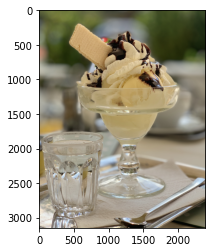

In [24]:
from skimage.io import imread #The imread function is a built-in function in scikit-image that can be used to read image files into numpy arrays
# Load the image and resize it

url=input('Enter URL of Image :') #produces a working input box
img=imread(url) #read image from the given url


#img = cv2.imread('C:\\Users\Maneka Wijesundara\\Desktop\MLAssignment\\mywork\\Micro_Organism\\Amoeba\\Image_1.jpg')
resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #The resize function takes as input an image array and a target size, and returns a new image array that has been resized to the target size.
plt.imshow(img) #displays the image
# Flatten and normalize the image
flattened_img = resized_img.flatten() / 255.0 #This line of code flattens a resized image array (resized_img) into a 1-dimensional numpy array using the flatten function, and then normalizes the array by dividing each element by 255.0.

# Make a prediction
predicted_label = svc.predict([flattened_img])[0] #stores the predicted label in the variable predicted_label.

# Print the predicted label
print("This image shows a "+CATEGORIES[predicted_label]) #prints the predicted label